# Ex. 01 - Sum-of-products vectorization

Assume you are given two vectors $\bar{a}$ and $\bar{b}$, and you want to compute $\sum a(i)*b(j) \quad \forall (i, j)$.

Propose a pure procedural solution in Python and a vectorized solution using NumPy. 
Evaluate the cost, in term of time, of your algorithms. Make sure to use inputs of relevant size, e.g., at least in the order of the thousands of elements.

## Hints
- You may need to use broadacasting to perform the desired computation
- NumPy arrays expose built-in methods, such as `sum()` that may come in handy 

In [10]:
import numpy as np

a=np.arange(4)
b=np.arange(3)[:,np.newaxis]

print(a)
print(b)

c=10

print(a+b)


[0 1 2 3]
[[0]
 [1]
 [2]]
[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]]


# Ex. 02 - Sliding-window average
Given a one-dimensional array, compute moving averages of span `S` over the input data.

## Example
- `S` = `5`
- `in` = `[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]`
- `out` = `[6, 9, 12, 15, 18, 21]`

In [69]:
S=5
input=np.array([0, 3, 6, 9, 12, 15, 18, 21, 24, 27])
print(input)

tot=[]
for i in range(int(s/2)+1):
    tot.append(np.average(input[i:S+i]))

print(tot)

[ 0  3  6  9 12 15 18 21 24 27]
[6.0, 9.0, 12.0, 15.0, 18.0, 21.0]


# Ex. 03 - Higher-dimension Cartesian product
Given an arbitrary number of vectors, build the resulting Cartesian product, i.e., every combination of every item from every vector.

## Example:
Given three arrays `[1, 2]`, `[3, 4, 5]`, and `[6, 7]` the result should be the following:
```python
[[1 3 6]
 [1 3 7]
 [1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 3 6]
 [2 3 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]]
```

In [112]:
def prodCatesian(*arrays):
    lens= [len(a) for a in arrays]
    ix =np.indices(lens,dtype=int)
    ix = ix.reshape(len(arrays), -1).T
    for n,arr in enumerate(arrays):
        ix[:,n]=arr[ix[:,n]]    

    return ix

a=np.array([1,2])
b=np.array([3,4,5])
c=np.array([6,7])

out=prodCatesian(a,b,c)
print(out)


[[1 3 6]
 [1 3 7]
 [1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 3 6]
 [2 3 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]]


# Ex. 04.1 - Random walk 

In mathematics, a [random walk](https://en.wikipedia.org/wiki/Random_walk) is a random process that describes a path that consists of a succession of random steps on some mathematical space. 

For the purpose of this exercise let's consider a random walk in a mono-dimensional space, i.e., each step is just a step to the left or to the right, with equal probability, with respect to current position. Assume also that the starting point is the origin of our 1-d space.

Your task is to write a random walker with different approaches and then compare their time efficiency.
1. A procedural solution, in which the random walker is just a function
2. A OOP solution, in which the random walker is a class exposing the walk functionalities
3. A vectoried solution, in which the random walker exploit NumPy functionalities

## Hints
- In order to exploit vectorization, keep in mind that the result of a random walk in 1d can be though as the result of a sequence of cumulative sums of either +1 or -1 from a given starting position.

In [76]:
### 1
DIM=50
def procedural_random_walk(dim:int):
    walk=np.random.choice([1,-1],dim,p=[0.5,0.5])
    somma=0
    vet=[]
    for e in walk:
        somma+=e
        vet.append(somma)
    return vet


[1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 4, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, -1, -2, -1, 0, -1, 0, 1, 0, 1, 2, 1, 0, -1, 0, -1, -2, -3, -4, -5, -4, -3, -4]


In [83]:
### 2
def ClsRandomWalk():
    def __init__ (self,dim):
        self.dim=dim

    def generateWalk(self):
        return np.cumsum(np.random.choice([1,-1],self.dim,p=[0.5,0.5]))

c=ClsRandomWalk()
c.generateWalk()


AttributeError: 'NoneType' object has no attribute 'generateWalk'

In [81]:
### 3
def vectorized_random_walk(dim:int):
    array=np.random.choice([1,-1],dim,p=[0.5,0.5])
    return np.cumsum(array)

vectorized_random_walk(50)

array([-1, -2, -3, -4, -3, -2, -3, -4, -5, -4, -3, -2, -1, -2, -1,  0,  1,
        2,  3,  4,  3,  2,  1,  2,  3,  2,  1,  2,  3,  4,  3,  2,  3,  2,
        3,  2,  3,  4,  3,  2,  1,  0,  1,  2,  3,  2,  3,  2,  3,  4])

## Visualization

You can use the following code to visualize your random walk in a plot. You just need to substitute your data as the input vector.

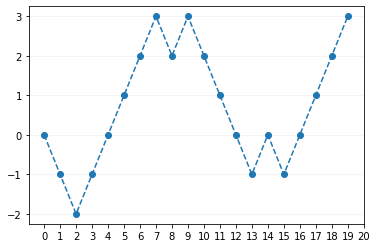

In [14]:
# Matplotlib code for 1-D random walk.
import matplotlib.pyplot as plt
 
v1=procedural_random_walk(DIM)
v2=ClsRandomWalk().ge
# Changes these hardcoded sample values with your results...
positions = [0, -1, -2, -1, 0, 1, 2, 3, 2, 3, 2, 1, 0, -1, 0, -1, 0, 1, 2, 3]
 
# plotting down the graph of the random walk in 1D
plt.plot(positions, 'o--')
plt.xticks(range(0, len(positions)+1))
plt.grid(axis='y', color='0.95')
plt.show()

# Ex. 04.2 - Random walk in higher dimensions
Revise the previous exercise to support random walks in higher dimensions. To keep things *simple*, take into account only 2d and 3d walks.

## Visualization [2D]

You can use the following code to visualize your random walk in a 2d plot. You just need to substitute your data as the input vector.

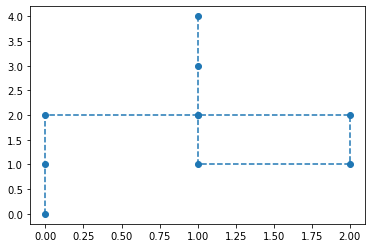

In [33]:
# Matplotlib code for 2-D random walk.
import matplotlib.pyplot as plt
 
# Changes these hardcoded sample values with your results...
positions = [(0,0), (0,1), (0,2), (1,2), (2,2), (2,1), (1,1), (1,2), (1,3), (1,4)]
 
# plotting down the graph of the random walk in 2D
plt.plot(*zip(*positions), 'o--')
plt.show()

# Ex. 06 - Python vs. NumPy vs. Numba

Conduct an experiment to compare performance of standard Python, NumPy and just-in-time compiled code using Numba.
Complete the following set of functions and/or choose the most appropriate NumPy methods and evaluate their efficiency over collections of random samples.

In [4]:
import numpy as np
import numba

data = np.random.randn(50000)

In [17]:
def py_sum(data):
    """
    A pure Python function to sum all the values within a collection
    """
    pass

In [18]:
def py_cumulative_sum(data):
    """
    A pure Python function that generate a collection of cimulative sums over an input collections
    e.g., in = [1,2,3,4] out = [1,3,6,10]
    """
    pass

In [19]:
...
def jit_sum(data):
    """
    A jit-decorated Python function to sum all the values within a collection
    """
    pass

# Ex. 07 - Julia Set

In complex dynamics, the Julia set consists of a family of functions that demonstrate how small variations in parameters may have drastic changes in the sequence of iterated function values, i.e., they manifest some sort of chaotic behaviour.

In its general form, a Julia function is in the form $f(z) = z^2 + c$ where $c$ is a complex number. For each different $c$ we get a different Julia set.

We can *draw* our Julia set implementing the following pseudo-algorithm

```{r, tidy=FALSE, eval=FALSE, highlight=FALSE }
c = ...
for x in x_range do:
  for y in y_range do:
    z = x + i*y # sample a complex point in the complex plane
    N = 0 # initial color for this sample
    while absolute(z) < 2 and N < MAX_ITERATIONS: # iterate until convergence
      z = z^2 + c
    j[x, y] = N # set the final value for this point
```

Implement a function to evaluate the Julia set in a subset of the complex plane both in pure Python and in a vectorized fashion using NumPy. Evaluate the performance of both implementations, as well as the performance of the Numba decorated version of your Python function.

Complete the code snippets below to fullfil these tasks. Both the NumPy version and the Python version rely on a NumPy array to store the end result, for generality.

Using the default values below, you should obtain a set similiar to the following image.
<center><img src="./sample_julia.jpg"/><center/>

In [ ]:
import numpy as np
import numba
import matplotlib.pyplot as plt

X_MIN = -1
X_MAX = 1
Y_MIN = -1
Y_MAX = 1
N = 1000

# Various c you can try
c_1 = -0.4 + 0.6j
c_2 = -0.8j
c_3 = -0.8 + 0.15j
c_4 = -0.05 + 0.68j

def py_julia_set(c=-0.4 + 0.6j, max_iter = 100):
    X = np.linspace(X_MIN, X_MAX, N)
    Y = np.linspace(Y_MIN, Y_MAX, N)
    J = ...
    return J
                    
jit_julia_set = numba.jit(nopython=True)(py_julia_set)

def np_julia_set(c=-0.4 + 0.6j, max_iter = 100):
    ...
    J = ...
    ...
    return J

J = py_julia_set()
# J = jit_julia_set()
# J = np_julia_set()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
ax.imshow(J, cmap='magma', extent=[X_MIN, X_MAX, Y_MIN, Y_MAX])
plt.show()

# Ex. 08 - Min-max Normalization
Rescaling (also called [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling)) is a normalization technique that is frequently used when trying to compare datasets with different scales or that use different units, such as comparing miles to meters. Given a dataset $X$, rescaling applies the following formula to normalize each value $x \in X$ to scale the range in $[0, 1]$:

$$
x' = \frac{x - min(X)}{max(X) - min(X)}
$$

Write a Python program that does the following:
- Generate two random datasets of size `DATASET_SIZE` with values whose scale cannot be immediately compared to one another.
- Build a custom universal function that applies rescaling to a dataset.
- Compare the performace of rescaling performed using the custom universal function to the same operation done using a list comprehension.
- Compute the (rescaled) standard deviation of each dataset to determine which of them shows the greater amount of variation.

## Hints
- The function `numpy.frompyfunc` creates a NumPy `ufunc` from an arbitrary Python function.
- The classes in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=scipy%20stats#module-scipy.stats) allows us to generate datasets starting from different types of univariate random distributions. In particular take a look at the `rvs()` method of those classes.